In [2]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
df_mexico = pd.read_csv('./datasets/mexico.csv')

In [5]:
def plot_results(df, country, log_scale: bool = False, show_difference: bool = False):
    L1 = df['gpe'].str.split(', ').explode()
    L1 = L1.str.strip()

    L2 = df['detected_gpe'].str.split(', ').explode()
    L2 = L2.str.strip()
    
    freq1 = Counter(L1)
    freq2 = Counter(L2)

    all_keys_1 = set(freq1.keys()).union(set(freq2.keys()))

    comparison_df_1 = pd.DataFrame({
    'location': list(all_keys_1),
    f'{country}_Actual': [freq1.get(loc, 0) for loc in all_keys_1],
    f'{country}_Detected': [freq2.get(loc, 0) for loc in all_keys_1]
    })

    comparison_df_1['location'] = comparison_df_1['location'].str.lower().str.strip()
    merged_df_1 = comparison_df_1.groupby('location', as_index=False).sum()

    filtered_df_1 = merged_df_1[(merged_df_1[f'{country}_Actual'] > 0) & (merged_df_1[f'{country}_Detected'] > 0)]
    filtered_df_1 = filtered_df_1[filtered_df_1['location'].str.split().str.len() <= 3]

    if show_difference:
        filtered_df_1['diff'] = filtered_df_1[f'{country}_Actual'] - filtered_df_1[f'{country}_Detected']
        ax = filtered_df_1.set_index('location')['diff'].plot(
            kind='bar', figsize=(12, 10), color=filtered_df_1['diff'].apply(lambda x: 'green' if x >= 0 else 'red')
        )
        ax.axhline(0, color='black', linewidth=1)
        ax.set_title(f'Difference in Frequency (Actual - Detected) - {country}')
        ax.set_ylabel('Difference in Count')
        for i, value in enumerate(filtered_df_1['diff']):
            ax.text(i, value + (0.5 if value >= 0 else -0.5), str(value),
                    ha='center', va='bottom' if value >= 0 else 'top', fontsize=8)
    else: 
        ax = filtered_df_1.set_index('location').plot(kind='bar', figsize=(12, 6))  # ✅ Set size here
        if log_scale:
            ax.set_yscale('log')
            ax.set_title('Location Frequency Comparison (Log Scale)')
        else:
            ax.set_title('Location Frequency Comparison (Linear Scale)')
        ax.set_ylabel('Frequency')


    ax.set_xlabel('Location')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

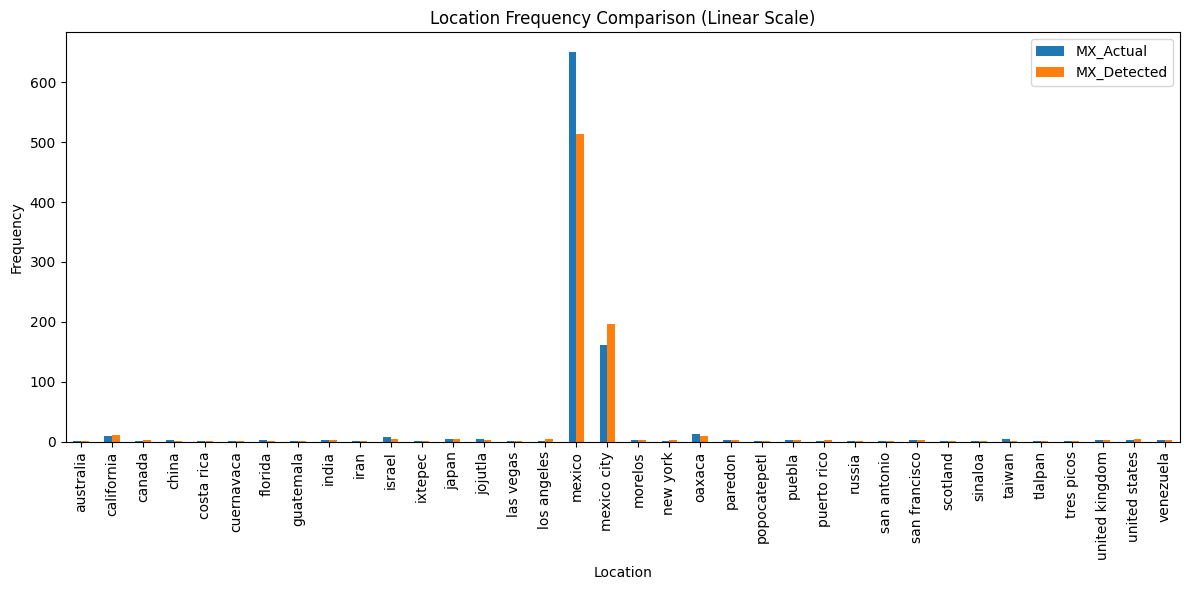

In [9]:
plot_results(df_mexico, 'MX')

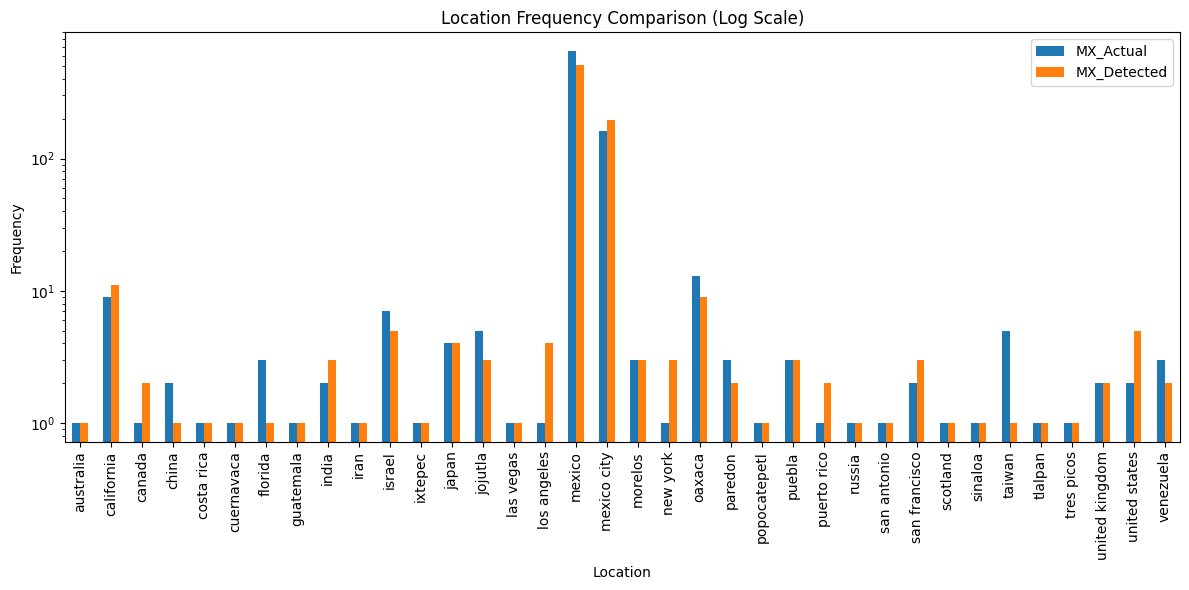

In [10]:
plot_results(df_mexico, 'MX', log_scale=True)

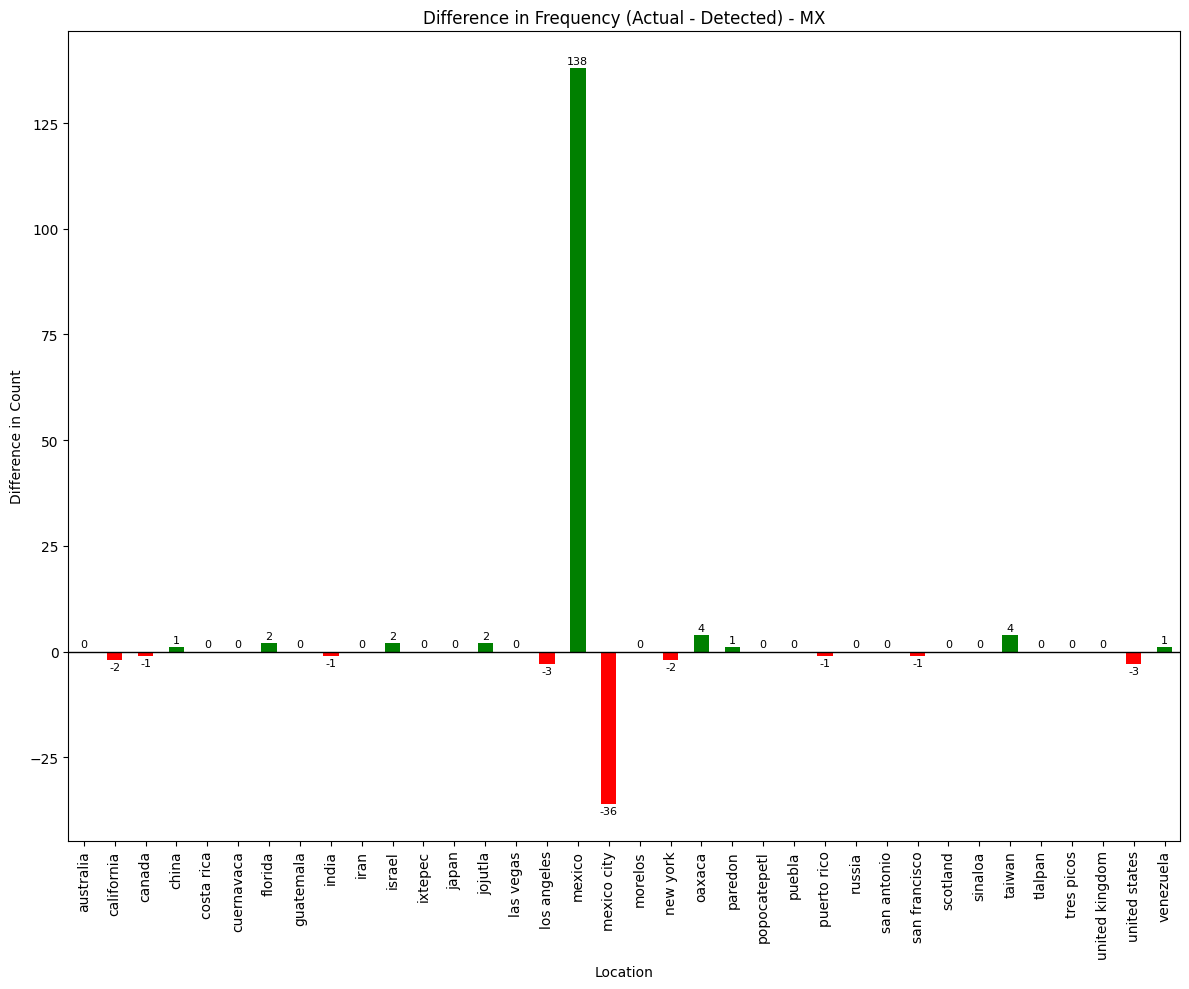

In [11]:
plot_results(df_mexico, 'MX', show_difference=True)